# scikit-learnでクラスタリング

## クラスタリングとは
### 概要
- 教師なしデータ分類の手法
- データの集まりをデータ間の類似度に従って、いつかのグループに分ける
- 階層的手法と非階層的手法に分類される

#### 階層的手法
> 各データを１つのクラスタとし、クラスタ間の距離や類似度に基づいてクラスタを逐次的に併合していく手法
- 最短距離法 (nearest neighbor method) 
- 最長距離法 (furthest neighbor method)
- 群平均法 (group average method)
- ウォード法 (Ward’s method)

#### 非階層的手法
> データの分割の良さを表す評価関数によって、最適解を探索する手法
> 階層的手法ではデータが多いと階層構造が複雑になってしまうため、非階層的手法のほうが実用的
- k-means法（k平均法）

http://nlp.dse.ibaraki.ac.jp/~shinnou/zemi2008/Rclustering/r-tanaka-0415.pdf:title  
http://www.kamishima.net/jp/clustering/

### ビジネスでの活用例
#### 市場細分化に基づくターゲット市場の選定
> ・顧客をセグメンテーションし、セグメントに適合するマーケティング施策を展開する  
> ・顧客のどの属性をセグメンテーション変数として使うべきかは、分析の目的に合わせて選別する必要がある  
> ・コトラーによる顧客市場の主要なセグメンテーション変数には、以下４つがある  
1. 人口統計学的変数 (Demographic Variables)
2. 地理的変数 (Geographic Variables)
3. 心理的変数 (Psychographic Variables)
4. 行動変数 (Behavioral Variables)

#### 製品ポジショニングによる差別化戦略の策定
> ・競合製品の属性でクラスタ分析を行うことで、競合製品に対する優位性に着目して製品のポジションを確立するなど差別化を図る  
> ・競合が参入していない空白マーケットを発見し、新規市場を開拓する

#### テストマーケットにおけるマーケティング施策の評価
> ・マーケットのクラスタ分析を実施することで、テストマーケット※の有効性を保証する  
> 　※マーケティング施策を展開する前に、少数の顧客からなるテストマーケットでテストを行い、事前評価を行うのが一般的

https://enterprisezine.jp/iti/detail/6762

### クラスタ分析を行う際に注意すべきこと
> ・クラスタ分析は探索的な分析手法のため、複数回の分析結果を比較したり、異なる手法で分析結果を確認したりして、  
　地道な検証作業を繰り返すことで意思決定に有用な分析結果を導き出さなければならない  
> ・欠損値の有無や標準化の必要性に関する確認が事前作業として不可欠
1. データから外れ値を除外すること
2. 分析データから分類理由を正しく説明できるかを常に考え、分析目的をサポートする属性を見極めること

## 今回使用するデータ
### Wholesale customers Data Set  (卸売業者の顧客データ) 
例によって、カリフォルニア大学アーバイン校(University of California, Irvine)のMachine Learning Repositoryから取得した  
事例がいくつも転がっていて、のちにサンプルをいくつか見れて助かることになった

#### データセットの情報（Data Set Information）
ポルトガルの卸売業者の顧客のデータ（2011年(通年)、通貨単位の年間支出）。  
大元のデータベースからサンプリングしたデータセット。  
卸売の取引額なので、利益ではないことに注意したい。  


以下、英訳のニュアンスが難しかったので、誤っている可能性あり。。　　


```
1）FRESH  ：生鮮品の年間支出（通貨単位）
2）MILK   ：乳製品の年間支出（通貨単位）
3）GROCERY：食料品の年間支出（通貨単位）
4）FROZEN ：冷凍品の年間支出（通貨単位）
5）DETERGENTS_PAPER：洗剤、紙製品の年間支出（通貨単位）
6）DELICATESSEN：デリカテッセン(惣菜)の年間支出（通貨単位）
7）CHANNEL：販売チャネル - Horeca（ホテル/レストラン/カフェ）またはその他の販売チャネル
8）REGION ：消費地域 - リスボン、ポルト、その他
```
統計量：
Product | Minimum | Maximum | Mean | Std.Deviation
:--|--:|:--|--:|:--:
FRESH  | 3 | 112151 | 12000.30 | 12647.329
MILK | 55 | 73498| 5796.27| 7380.377
GROCERY | 3 | 92780 | 7951.28 | 9503.163
FROZEN | 25 | 60869 | 3071.93 | 4854.673
DETERGENTS_PAPER | 3 | 40827 | 2881.49 | 4767.854
DELICATESSEN | 3 | 47943 | 1524.87 | 2820.106

REGION | Frequency 
:--|--:
Lisbon | 77 
Oporto |47 
Other Region | 316 
Total | 440 

CHANNEL | Frequency
:--|--:
Horeca | 298 
Retail | 142 
Total | 440 
```

## 試行過程と結果
### まずはデータを見てみる
データをダウンロードしてjupyter notebookにインポートする
#### rawデータを確認

In [1]:
import pandas as pd
import_df = pd.read_csv('Wholesale_customers_data.csv')
import_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### ChannelとRegionの値が何を示しているのか不明なので特定する
まずはChannel

In [2]:
import_df.groupby(['Channel']).count()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,298,298,298,298,298,298,298
2,142,142,142,142,142,142,142


データセットの情報と突き合わせると  
- 1:Hoterica  
- 2:Retail  
であることがわかる。

Regionはどうだろうか？

In [3]:
import_df.groupby(['Region']).count()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,77,77,77,77,77,77,77
2,47,47,47,47,47,47,47
3,316,316,316,316,316,316,316


こちらもデータセットの情報と突き合わせて  
- 1:Lisbon  
- 2:Oporto  
- 3:Other Region  
であることがわかった。

#### データの特徴量

In [4]:
import_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


- 欠損値はない  
- 卸売額は、Fresh, Grocery, Milk, Frozen, Detergents_Paper, Delicassenの順で大きい
- 小口から大口まで、多様な顧客を持っている

### データの分布を見てみる
とりかかる前に、Channel, Regionごとのデータフレームに分割しておく

#### Channelごとのデータフレーム

In [5]:
# Horeca
df_Channel1 = import_df[import_df['Channel']==1].drop(['Channel'],axis=1)
# Retail
df_Channel2 = import_df[import_df['Channel']==2].drop(['Channel'],axis=1)

#### Regionごとのデータフレーム

In [6]:
# Lisbon
df_Region1 = import_df[import_df['Region']==1].drop(['Region'],axis=1)
# Oporto
df_Region2 = import_df[import_df['Region']==2].drop(['Region'],axis=1)
# Other Region
df_Region3 = import_df[import_df['Region']==3].drop(['Region'],axis=1)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Freshの分布
まずはChannelごと

([array([ 73.,  56.,  50.,  28.,  27.,  15.,  14.,  12.,   2.,   6.,   5.,
           2.,   1.,   1.,   3.]),
  array([ 53.,  29.,  21.,  11.,  12.,   7.,   4.,   1.,   1.,   1.,   1.,
           1.,   0.,   0.,   0.])],
 array([     0.,   4000.,   8000.,  12000.,  16000.,  20000.,  24000.,
         28000.,  32000.,  36000.,  40000.,  44000.,  48000.,  52000.,
         56000.,  60000.]),
 <a list of 2 Lists of Patches objects>)

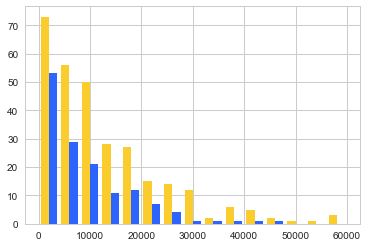

In [8]:
plt.hist([df_Channel1['Fresh'],df_Channel2['Fresh']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))

- Channelごとでそれほど分布は変わらない

次はRegionごと

([array([ 24.,  16.,  13.,   7.,   4.,   4.,   3.,   3.,   0.,   0.,   0.,
           1.,   0.,   1.,   1.]),
  array([ 14.,   9.,  10.,   3.,   5.,   2.,   2.,   1.,   1.,   0.,   0.,
           0.,   0.,   0.,   0.]),
  array([ 88.,  60.,  48.,  29.,  30.,  16.,  13.,   9.,   2.,   7.,   6.,
           2.,   1.,   0.,   2.])],
 array([     0.,   4000.,   8000.,  12000.,  16000.,  20000.,  24000.,
         28000.,  32000.,  36000.,  40000.,  44000.,  48000.,  52000.,
         56000.,  60000.]),
 <a list of 3 Lists of Patches objects>)

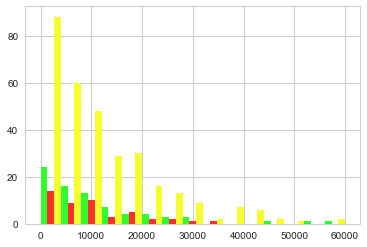

In [9]:
plt.hist([df_Region1['Fresh'],df_Region2['Fresh'],df_Region3['Fresh']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))

- Regionごとでもそれほど分布は変わらない

#### Milkの分布
Channelごと

([array([ 170.,   81.,   25.,    8.,    6.,    0.,    4.,    0.,    2.,
            0.,    0.,    1.,    0.,    0.,    0.]),
  array([  6.,  25.,  41.,  22.,  22.,   8.,   2.,   3.,   3.,   2.,   2.,
           1.,   0.,   1.,   1.])],
 array([     0.        ,   2666.66666667,   5333.33333333,   8000.        ,
         10666.66666667,  13333.33333333,  16000.        ,  18666.66666667,
         21333.33333333,  24000.        ,  26666.66666667,  29333.33333333,
         32000.        ,  34666.66666667,  37333.33333333,  40000.        ]),
 <a list of 2 Lists of Patches objects>)

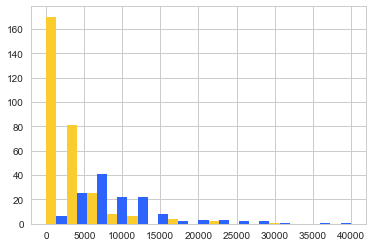

In [10]:
plt.hist([df_Channel1['Milk'],df_Channel2['Milk']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,40000))

- MilkはRetailの方が、取引先あたりの卸売額が大きい傾向がある

Regionごと

([array([ 33.,  16.,  12.,   4.,   6.,   1.,   2.,   0.,   2.,   0.,   1.,
           0.,   0.,   0.,   0.]),
  array([ 24.,  11.,   3.,   0.,   4.,   2.,   1.,   1.,   0.,   1.,   0.,
           0.,   0.,   0.,   0.]),
  array([ 119.,   79.,   51.,   26.,   18.,    5.,    3.,    2.,    3.,
            1.,    1.,    2.,    0.,    1.,    1.])],
 array([     0.        ,   2666.66666667,   5333.33333333,   8000.        ,
         10666.66666667,  13333.33333333,  16000.        ,  18666.66666667,
         21333.33333333,  24000.        ,  26666.66666667,  29333.33333333,
         32000.        ,  34666.66666667,  37333.33333333,  40000.        ]),
 <a list of 3 Lists of Patches objects>)

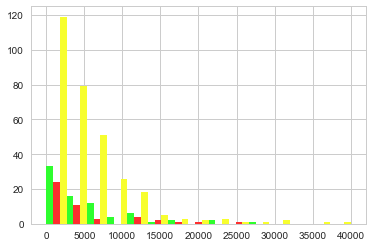

In [11]:
plt.hist([df_Region1['Milk'],df_Region2['Milk'],df_Region3['Milk']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,40000))

- Regionごとではそれほど分布は変わらない

#### Groceryの分布
Channelごと

([array([ 149.,   86.,   31.,   14.,    7.,    5.,    4.,    2.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.]),
  array([  0.,   9.,  17.,  24.,  25.,  17.,   6.,  12.,  10.,   4.,   6.,
           1.,   3.,   2.,   1.])],
 array([     0.        ,   2666.66666667,   5333.33333333,   8000.        ,
         10666.66666667,  13333.33333333,  16000.        ,  18666.66666667,
         21333.33333333,  24000.        ,  26666.66666667,  29333.33333333,
         32000.        ,  34666.66666667,  37333.33333333,  40000.        ]),
 <a list of 2 Lists of Patches objects>)

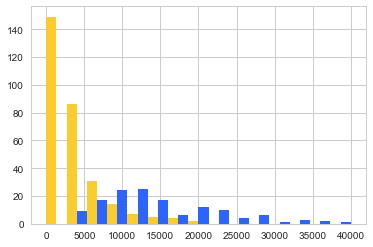

In [12]:
plt.hist([df_Channel1['Grocery'],df_Channel2['Grocery']],
        bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,40000))

- GroceryはRetailの方が、取引先あたりの卸売額が大きい傾向がある

Regionごと

([array([ 30.,  17.,   9.,   4.,   2.,   5.,   2.,   1.,   3.,   1.,   0.,
           0.,   1.,   1.,   1.]),
  array([ 11.,  12.,   6.,   4.,   4.,   3.,   1.,   2.,   1.,   1.,   1.,
           0.,   0.,   0.,   0.]),
  array([ 108.,   66.,   33.,   30.,   26.,   14.,    7.,   11.,    6.,
            2.,    5.,    1.,    2.,    1.,    0.])],
 array([     0.        ,   2666.66666667,   5333.33333333,   8000.        ,
         10666.66666667,  13333.33333333,  16000.        ,  18666.66666667,
         21333.33333333,  24000.        ,  26666.66666667,  29333.33333333,
         32000.        ,  34666.66666667,  37333.33333333,  40000.        ]),
 <a list of 3 Lists of Patches objects>)

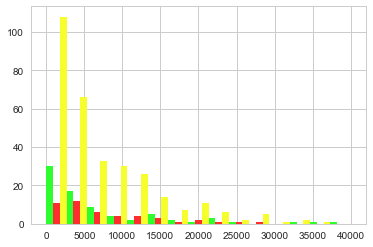

In [13]:
plt.hist([df_Region1['Grocery'],df_Region2['Grocery'],df_Region3['Grocery']],
        bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,40000))

- RegionごとではOther Region方が、取引先あたりの卸売額が大きい傾向がある

#### Frozenの分布
Channelごと

([array([ 116.,   64.,   33.,   19.,   19.,   10.,   10.,   10.,    1.,
            3.,    1.,    3.,    3.,    2.,    1.]),
  array([ 84.,  32.,  14.,   5.,   2.,   2.,   2.,   0.,   1.,   0.,   0.,
           0.,   0.,   0.,   0.])],
 array([     0.        ,   1333.33333333,   2666.66666667,   4000.        ,
          5333.33333333,   6666.66666667,   8000.        ,   9333.33333333,
         10666.66666667,  12000.        ,  13333.33333333,  14666.66666667,
         16000.        ,  17333.33333333,  18666.66666667,  20000.        ]),
 <a list of 2 Lists of Patches objects>)

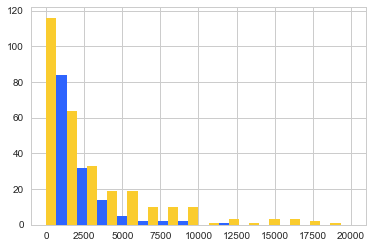

In [14]:
plt.hist([df_Channel1['Frozen'],df_Channel2['Frozen']],
        bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,20000))

- FrozenはHorecaの方が、取引先あたりの卸売額が大きい傾向がある

Regionごと

([array([ 31.,  17.,   8.,   8.,   4.,   5.,   1.,   1.,   1.,   0.,   0.,
           0.,   0.,   0.,   1.]),
  array([ 22.,   9.,   7.,   2.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,
           1.,   0.,   0.,   0.]),
  array([ 147.,   70.,   32.,   14.,   17.,    6.,   10.,    8.,    0.,
            2.,    1.,    2.,    3.,    2.,    0.])],
 array([     0.        ,   1333.33333333,   2666.66666667,   4000.        ,
          5333.33333333,   6666.66666667,   8000.        ,   9333.33333333,
         10666.66666667,  12000.        ,  13333.33333333,  14666.66666667,
         16000.        ,  17333.33333333,  18666.66666667,  20000.        ]),
 <a list of 3 Lists of Patches objects>)

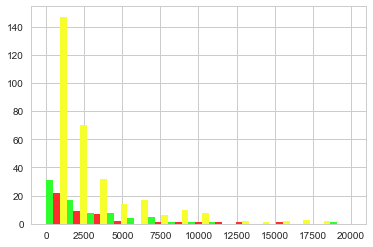

In [15]:
plt.hist([df_Region1['Frozen'],df_Region2['Frozen'],df_Region3['Frozen']],
        bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,20000))

#### Detergents_Paperの分布
Channelごと

([array([ 263.,   19.,   12.,    2.,    2.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    0.]),
  array([  8.,  21.,  35.,  17.,  24.,  11.,   2.,   8.,   4.,   1.,   2.,
           3.,   1.,   0.,   2.])],
 array([     0.        ,   1666.66666667,   3333.33333333,   5000.        ,
          6666.66666667,   8333.33333333,  10000.        ,  11666.66666667,
         13333.33333333,  15000.        ,  16666.66666667,  18333.33333333,
         20000.        ,  21666.66666667,  23333.33333333,  25000.        ]),
 <a list of 2 Lists of Patches objects>)

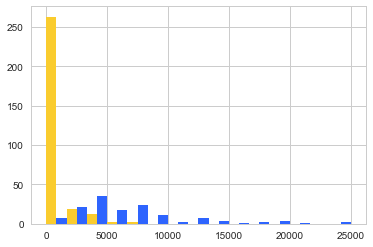

In [16]:
plt.hist([df_Channel1['Detergents_Paper'],df_Channel2['Detergents_Paper']],
        bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,25000))

- 洗剤、紙製品はRetailの方が、取引先あたりの卸売額が大きい傾向がある

Regionごと

([array([ 52.,   4.,   8.,   5.,   0.,   3.,   0.,   2.,   1.,   0.,   0.,
           2.,   0.,   0.,   0.]),
  array([ 28.,   3.,   5.,   2.,   2.,   2.,   1.,   2.,   0.,   0.,   1.,
           0.,   0.,   0.,   0.]),
  array([ 191.,   33.,   34.,   12.,   24.,    6.,    1.,    4.,    3.,
            1.,    1.,    1.,    1.,    0.,    2.])],
 array([     0.        ,   1666.66666667,   3333.33333333,   5000.        ,
          6666.66666667,   8333.33333333,  10000.        ,  11666.66666667,
         13333.33333333,  15000.        ,  16666.66666667,  18333.33333333,
         20000.        ,  21666.66666667,  23333.33333333,  25000.        ]),
 <a list of 3 Lists of Patches objects>)

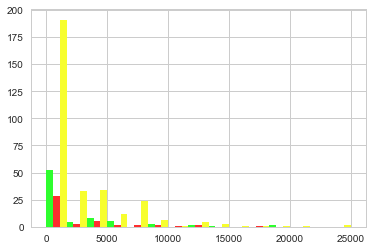

In [17]:
plt.hist([df_Region1['Detergents_Paper'],df_Region2['Detergents_Paper'],df_Region3['Detergents_Paper']],
        bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,25000))

- Regionごとではそれほど分布は変わらない

#### Delicatessenの分布
Channelごと

([array([ 207.,   61.,   15.,    8.,    2.,    1.,    1.,    0.,    0.,
            0.,    2.,    0.,    0.,    0.,    0.]),
  array([ 69.,  47.,  14.,   6.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.])],
 array([     0.        ,   1333.33333333,   2666.66666667,   4000.        ,
          5333.33333333,   6666.66666667,   8000.        ,   9333.33333333,
         10666.66666667,  12000.        ,  13333.33333333,  14666.66666667,
         16000.        ,  17333.33333333,  18666.66666667,  20000.        ]),
 <a list of 2 Lists of Patches objects>)

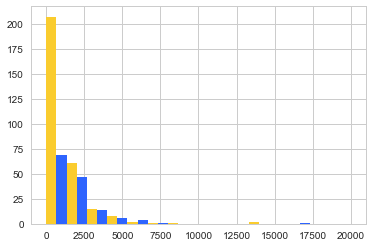

In [18]:
plt.hist([df_Channel1['Delicassen'],df_Channel2['Delicassen']],
        bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], rwidth=100, range=(0,20000))

- Channelごとではそれほど分布は変わらない

Regionごと

([array([ 50.,  17.,   7.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.]),
  array([ 34.,  10.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.]),
  array([ 192.,   81.,   20.,   13.,    4.,    1.,    1.,    0.,    0.,
            0.,    2.,    0.,    1.,    0.,    0.])],
 array([     0.        ,   1333.33333333,   2666.66666667,   4000.        ,
          5333.33333333,   6666.66666667,   8000.        ,   9333.33333333,
         10666.66666667,  12000.        ,  13333.33333333,  14666.66666667,
         16000.        ,  17333.33333333,  18666.66666667,  20000.        ]),
 <a list of 3 Lists of Patches objects>)

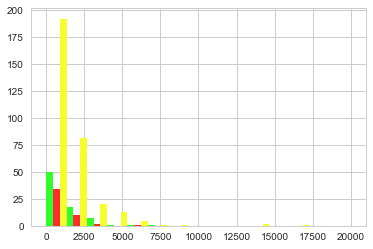

In [19]:
plt.hist([df_Region1['Delicassen'],df_Region2['Delicassen'],df_Region3['Delicassen']],
        bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,20000))

- Regionごとではそれほど分布は変わらない

### グループ化してクロス集計してみる
#### Regionでグループ化  
データの情報にあったが、取引先の数を見てみる。合計行を追加しておく

In [20]:
import_df['Total'] = import_df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].sum(axis=1)
import_df[['Region','Total']].groupby(['Region']).count()

,Total
Region,
1,77
2,47
3,316


- 取引先の数は、Other Region, Lisbon, Oportoの順で多い

取引額は、取引先の数に比例しそうだがどうだろうか

In [21]:
import_df.drop('Channel',axis=1).groupby(['Region']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Region,,,,,,,
1,854833,422454,570037,231026,204136,104327,2386813
2,464721,239144,433274,190132,173311,54506,1555088
3,3960577,1888759,2495251,930492,890410,512110,10677599


- 取引額も、Other Region, Lisbon, Oportoの順で多い
- 卸業者なので、ロジスティクスを考えると取引先との距離と関係が深いかもしれない

取引先あたりの卸売額を見てみる

In [22]:
import_df.drop('Channel',axis=1).groupby(['Region']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Region,,,,,,,
1,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
2,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
3,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253


- Grocery, Frozen, Detergents_Paperは取引先あたりの卸売額順が、Regionごとの卸売額順と異なる
- OportoのGrocery, Frozen, Detergents_Paperは、Regionごとの卸売額の割に取引先あたりの卸売額が大きい

#### Channelでグループ化
取引先の数を見てみる

In [23]:
import_df[['Channel','Total']].groupby(['Channel']).count()

,Total
Channel,
1,298
2,142


- 取引先の数は、Horecaが倍近く多い

取引額は、取引先の数に比例しそうだがどうだろうか。

In [24]:
import_df.drop('Region',axis=1).groupby(['Channel']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Channel,,,,,,,
1,4015717,1028614,1180717,1116979,235587,421955,7999569
2,1264414,1521743,2317845,234671,1032270,248988,6619931


- Horecaは、Retailに対して倍近い取引があるにもかかわらず、卸売額はそれほど大きな差がない
- ポルトガルの生活感がわからないので、データから解釈するには想像の域を出ないことが多い
- 両方を比べると、Horecaの卸売額がRetailを上回るのは、Fresh, Frozen, Dericatessen  
日本の飲食店でバイトした経験から、Milkは専門の別卸売業者から、Groceryは加工食品のため少ないものと想像
- その他の販売チャネルでFreshの額がHorecaと比べて小さいのは、Freshを専売している商店の集まった市場が多いのかも

- Horeca
 - Fresh, Grocery, Frozenの順で卸売額が多い
 - Detergents_Paperは、特にHotelで専門の卸売業者から仕入れているか、もしくはRetailほど数は出ないということか
 - Delicatessenは、調理したものを客に出すため少ないのだろう
 
- その他の販売チャネル(スーパーマーケット、商店等？)
 - Grocery, Milk, Freshの順で卸売額が多い

取引先あたりの卸売額を見てみる

In [25]:
import_df.drop('Region',axis=1).groupby(['Channel']).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
Channel,,,,,,,
1,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
2,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394


- 取引先ごとの取引額でみると、Delicatessenは取引先あたりの卸売額順が、販売チャネルごとの卸売額順と異なる

##### RegionとChannelでグループ化してクロス集計

取引先の数を見てみる

In [26]:
import_df[['Region','Channel','Total']].groupby(['Region','Channel']).count()

Total
Region Channel       
1      1           59
       2           18
2      1           28
       2           19
3      1          211
       2          105

- 全取引先に対する地域ごとのHorecaの比率はリスボンが高い

取引額はどうだろうか

In [27]:
import_df.groupby(['Region','Channel']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
1      1         761233   228342   237542  184512             56081   
       2          93600   194112   332495   46514            148055   
2      1         326215    64519   123074  160861             13516   
       2         138506   174625   310200   29271            159795   
3      1        2928269   735753   820101  771606            165990   
       2        1032308  1153006  1675150  158886            724420   

                Delicassen    Total  
Region Channel                       
1      1             70632  1538342  
       2             33695   848471  
2      1             30965   719150  
       2             23541   835938  
3      1            320358  5742077  
       2            191752  4935522

- 利益をあげている地域と販売チャネルは
     1. Other RegionのHoreca
     2. Other RegionのRetail
     3. LisbonのHoreca
- 品目単位で利益をあげているのは
     1. Other Region,Horeca,Fresh
     2. Other Region,Retail,Grocery
     3. Other Region,Retail,Milk
- ポルトのHotericaは全体の特徴と異なり、生鮮品、冷凍品、食料品の順で卸売額が多い

取引先あたりの卸売額はどうだろうか

In [28]:
import_df.groupby(['Region','Channel']).mean()

Fresh          Milk       Grocery       Frozen  \
Region Channel                                                          
1      1        12902.254237   3870.203390   4026.135593  3127.322034   
       2         5200.000000  10784.000000  18471.944444  2584.111111   
2      1        11650.535714   2304.250000   4395.500000  5745.035714   
       2         7289.789474   9190.789474  16326.315789  1540.578947   
3      1        13878.052133   3486.981043   3886.734597  3656.900474   
       2         9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen         Total  
Region Channel                                               
1      1              950.525424  1197.152542  26073.593220  
       2             8225.277778  1871.944444  47137.277778  
2      1              482.714286  1105.892857  25683.928571  
       2             8410.263158  1239.000000  43996.736842  
3      1              786.682464  1518.284360  27213.635071  
       2             6899.238095  1826.209524  47004.971429

- Retailの方が、取引先あたりの卸売額が大きい
- 取引先あたりの卸売額が多いのは
    1. Lisbon,Retail
    2. Other Region,Retail
    3. Oporto,Retail

### 分析の目的を定める
本音はただクラスタリングを試したいだけなのだが、分析が必要になった背景を仮定したい。  
新たに現在取り扱っていない多品目を生産している生産者から生鮮食品を仕入れられることになった。  
クラスタリングした結果から、新たな生鮮品の発注を取れそうな見込み顧客を割り出したいと仮定する。

### クラスタリングを試す
#### クラスタリングに利用する項目を選定
MilkとDetergents_PaperはFreshと相関関係が薄いということにして除外しておく
- Region
- Channel
- Fresh
- Grocery
- Frosen
- Delicatessen

In [29]:
cluster_df = import_df.drop(['Milk','Detergents_Paper','Total'],axis=1)
cluster_df.head()

,Channel,Region,Fresh,Grocery,Frozen,Delicassen
0,2,3,12669,7561,214,1338
1,2,3,7057,9568,1762,1776
2,2,3,6353,7684,2405,7844
3,1,3,13265,4221,6404,1788
4,2,3,22615,7198,3915,5185


行列 (Array) に変換して転置する

In [30]:
import numpy as np
cluster_array = np.array([cluster_df['Channel'].tolist(),
                          cluster_df['Region'].tolist(),
                          cluster_df['Fresh'].tolist(),
                          cluster_df['Grocery'].tolist(),
                          cluster_df['Frozen'].tolist(),
                          cluster_df['Delicassen'].tolist()
                         ], np.int32)
cluster_array = cluster_array.T
cluster_array

array([[    2,     3, 12669,  7561,   214,  1338],
       [    2,     3,  7057,  9568,  1762,  1776],
       [    2,     3,  6353,  7684,  2405,  7844],
       ..., 
       [    2,     3, 14531, 30243,   437,  1867],
       [    1,     3, 10290,  2232,  1038,  2125],
       [    1,     3,  2787,  2510,    65,    52]], dtype=int32)

#### クラスタ分析を実行（本来はこれを何度も試行するが、今回は一回で）

In [31]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=6).fit_predict(cluster_array)
cluster

array([0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3,
       3, 3, 3, 0, 3, 2, 1, 3, 0, 3, 3, 0, 0, 3, 3, 2, 1, 3, 3, 2, 2, 0, 2,
       2, 4, 0, 2, 0, 0, 1, 0, 3, 0, 2, 0, 3, 0, 0, 4, 0, 2, 0, 2, 0, 3, 0,
       0, 3, 2, 0, 3, 0, 3, 0, 2, 0, 0, 0, 2, 0, 3, 0, 4, 2, 1, 0, 3, 0, 0,
       2, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 3, 0, 2, 0, 2, 0, 2, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 1, 0, 3, 2, 0, 0, 0, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0,
       0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 5,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 3, 3, 0, 0, 0, 2, 2, 3, 0, 0, 2, 0,
       0, 0, 2, 3, 2, 0, 0, 0, 2, 2, 3, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 3, 0, 1, 3, 3, 3, 0, 0, 2, 0, 3, 3, 0, 0, 2, 0,
       3, 0, 3, 0, 0, 1, 1, 0, 0, 3, 0, 2, 2, 2, 3, 2, 3, 0, 0, 0, 1, 0, 0,
       3, 0, 0, 3, 0, 0, 1, 3, 1, 1, 0, 3, 3, 1, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 3,

元のデータフレームにクラスタリングした番号を付与する

In [32]:
cluster_df['Cluster'] = cluster
cluster_df.head()

,Channel,Region,Fresh,Grocery,Frozen,Delicassen,Cluster
0,2,3,12669,7561,214,1338,0
1,2,3,7057,9568,1762,1776,0
2,2,3,6353,7684,2405,7844,0
3,1,3,13265,4221,6404,1788,3
4,2,3,22615,7198,3915,5185,3


各クラスタに分類されたサンプルの数

In [33]:
cluster_df[['Cluster','Fresh']].groupby(['Cluster']).count()

,Fresh
Cluster,
0,234
1,22
2,66
3,111
4,4
5,3


各クラスタの卸売額合計

In [34]:
cluster_df.drop(['Region','Channel'],axis=1).groupby('Cluster').sum()

,Fresh,Grocery,Frozen,Delicassen
Cluster,,,,
0,1322898,1089589,556762,237663
1,1101093,114951,129704,52896
2,358326,1411380,113735,128042
3,2311846,571537,406844,183451
4,105090,275247,12193,12641
5,80878,35858,132412,56250


各クラスタの取引先あたりの卸売額に卸売額の合計、顧客数を付与

In [35]:
cluster_df1 = cluster_df.drop(['Channel','Region'],axis=1).groupby('Cluster').mean()
count1 = np.array(cluster_df[['Cluster','Fresh']].groupby(['Cluster']).count())
Fresh_sum = np.array(cluster_df[['Cluster','Fresh']].groupby('Cluster').sum())
Grocery_sum = np.array(cluster_df[['Cluster','Grocery']].groupby('Cluster').sum())
Frozen_sum = np.array(cluster_df[['Cluster','Frozen']].groupby('Cluster').sum())
Delicassen_sum = np.array(cluster_df[['Cluster','Delicassen']].groupby('Cluster').sum())
cluster_df1['Count'] = count1
cluster_df1['Fresh_sum'] = Fresh_sum
cluster_df1['Grocery_sum'] = Grocery_sum
cluster_df1['Frozen_sum'] = Frozen_sum
cluster_df1['Delicassen_sum'] = Delicassen_sum
cluster_df1

,Fresh,Grocery,Frozen,Delicassen,Count,Fresh_sum,Grocery_sum,Frozen_sum,Delicassen_sum
Cluster,,,,,,,,,
0,5653.410256,4656.363248,2379.324786,1015.653846,234,1322898,1089589,556762,237663
1,50049.681818,5225.045455,5895.636364,2404.363636,22,1101093,114951,129704,52896
2,5429.181818,21384.545455,1723.257576,1940.030303,66,358326,1411380,113735,128042
3,20827.441441,5148.981982,3665.261261,1652.711712,111,2311846,571537,406844,183451
4,26272.500000,68811.750000,3048.250000,3160.250000,4,105090,275247,12193,12641
5,26959.333333,11952.666667,44137.333333,18750.000000,3,80878,35858,132412,56250


- Freshの卸売額が最も多く、Groceryの卸売額が少ない顧客層であるCluster'0'は、新たな生鮮品に反応する可能性が高く、一番の狙い目かもしれない

そこで
Cluster'0'に絞って、RegionとChannelから販促をかける対象をより絞ってみる

In [36]:
cluster_df2 = cluster_df[cluster_df['Cluster']==0]
cluster_df2.head()

,Channel,Region,Fresh,Grocery,Frozen,Delicassen,Cluster
0,2,3,12669,7561,214,1338,0
1,2,3,7057,9568,1762,1776,0
2,2,3,6353,7684,2405,7844,0
5,2,3,9413,5126,666,1451,0
6,2,3,12126,6975,480,545,0


In [37]:
cluster_df2[['Region','Channel','Fresh']].groupby(['Region','Channel']).count()

Fresh
Region Channel       
1      1           36
       2            5
2      1           17
       2            7
3      1          127
       2           42

In [38]:
cluster_df3 = cluster_df2.drop('Cluster',axis=1).groupby(['Region','Channel']).mean()
cluster_df3
count2 = np.array(cluster_df2[['Region','Channel','Fresh']].groupby(['Region','Channel']).count())
Fresh_sum2 = np.array(cluster_df2[['Region','Channel','Fresh']].groupby(['Region','Channel']).sum())
Grocery_sum2 = np.array(cluster_df2[['Region','Channel','Grocery']].groupby(['Region','Channel']).sum())
Frozen_sum2 = np.array(cluster_df2[['Region','Channel','Frozen']].groupby(['Region','Channel']).sum())
Delicassen_sum2 = np.array(cluster_df2[['Region','Channel','Delicassen']].groupby(['Region','Channel']).sum())
cluster_df3['Count'] = count2
cluster_df3['Fresh_sum'] = Fresh_sum2
cluster_df3['Grocery_sum'] = Grocery_sum2
cluster_df3['Frozen_sum'] = Frozen_sum2
cluster_df3['Delicassen_sum'] = Delicassen_sum2
cluster_df3

Fresh      Grocery       Frozen   Delicassen  Count  \
Region Channel                                                              
1      1        5924.666667  3567.138889  2436.861111   776.500000     36   
       2        4238.400000  7744.800000  3783.800000  1175.200000      5   
2      1        5749.058824  3799.705882  4361.705882   867.882353     17   
       2        4434.285714  9316.428571   790.428571   976.714286      7   
3      1        5538.874016  3152.811024  2513.055118   948.141732    127   
       2        6100.166667  9338.833333  1220.857143  1472.095238     42   

                Fresh_sum  Grocery_sum  Frozen_sum  Delicassen_sum  
Region Channel                                                      
1      1           213288       128417       87727           27954  
       2            21192        38724       18919            5876  
2      1            97734        64595       74149           14754  
       2            31040        65215        5533            6837  
3      1           703437       400407      319158          120414  
       2           256207       392231       51276           61828

- 取引先の数が多い順に販促をかけるとすると下記をターゲットにするのが良いかもしれない
    1. Other Region,Horeca
    2. Other Region,Retail
    3. Lisbon,Horeca

## 感想
- 分布を確認はして見たものの、特徴を掴むのにあまり有効な気がしなかった。やり方が悪い気がする
- グループ化は、RegionとChannelを組み合わせたものだけでよかったかも
- このぐらいのデータ量なら、クロス集計で一生懸命紐解いていったほうがわかりやすく有益な情報が得られそうな気がした
- クラスタリング後の考察が甘いが、事業を深く知る手立てがあれば、いろんな切り口で分析するアイデアが湧いてきそうで楽しいなと思えた！